In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv("./Data/Advertising.csv")
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
del data['Unnamed: 0']

In [4]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


Text(0, 0.5, 'Sales')

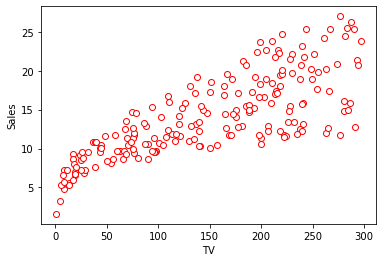

In [5]:
plt.scatter(data['TV'],data['Sales'],edgecolors="red",c="white")
plt.xlabel("TV")
plt.ylabel("Sales")

<AxesSubplot:xlabel='Newspaper', ylabel='Sales'>

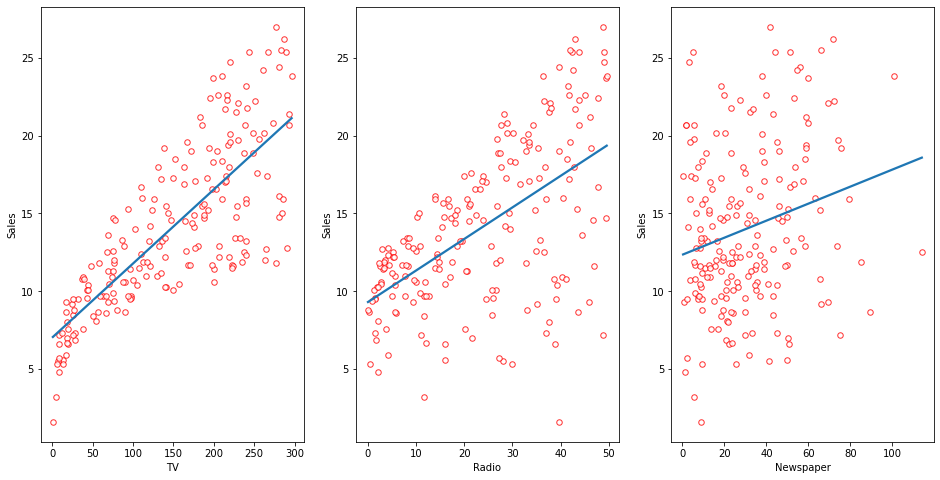

In [6]:
fig,ax = plt.subplots(nrows=1,ncols=3,figsize=(16,8))
sns.regplot(data=data,x="TV",y="Sales",order=1,ci=None,scatter_kws={"color":'white','s':30,'ec':'red'},ax=ax[0])
# ax[0].ylim(ymin=0)
# ax[0].xlim(-10,310)

sns.regplot(data=data,x="Radio",y="Sales",order=1,ci=None,scatter_kws={"color":'white','s':30,'ec':'red'},ax=ax[1])
# ax[1].ylim(ymin=0)
# ax[1].xlim(-10,310)

sns.regplot(data=data,x="Newspaper",y="Sales",order=1,ci=None,scatter_kws={"color":'white','s':30,'ec':'red'},ax=ax[2])
# ax[2].ylim(ymin=0)
# ax[2].xlim(-10,310)

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X = data[['TV']]
y = data.Sales

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [10]:
len(y_train)

120

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
lm = LinearRegression()

In [13]:
lm.fit(X_train,y_train)

LinearRegression()

In [14]:
print(lm.coef_)
print(lm.intercept_)

[0.04816674]
7.090591797171783


In [15]:
B0 = np.linspace(lm.intercept_-2,lm.intercept_+2,50)
B1 = np.linspace(lm.coef_-2,lm.coef_+2,50)

In [16]:
xx,yy=np.meshgrid(B0,B1)

In [17]:
Z=np.zeros(shape=(B0.size,B1.size))

In [18]:
X

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8
...,...
195,38.2
196,94.2
197,177.0
198,283.6


In [19]:
import statsmodels.formula.api as smf

In [20]:
est = smf.ols('Sales ~ TV',data=data).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


In [21]:
est.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [22]:
# Estimating the RSS
((data.Sales - (est.params[0] + (est.params[1]*data.TV)))**2).sum()/1000

2.1025305831313514

In [23]:
from sklearn.metrics import explained_variance_score, r2_score

In [24]:
pred = lm.predict(X_test)

In [25]:
explained_variance_score(y_test,pred)

0.6398273917258885

In [26]:
r2_score(y_test,pred)

0.6342157154527053

In [27]:
np.corrcoef(y_test,pred)**2

array([[1.        , 0.64134121],
       [0.64134121, 1.        ]])

In [28]:
X = data[['Radio']]
X

,Radio
0,37.8
1,39.3
2,45.9
3,41.3
4,10.8
...,...
195,3.7
196,4.9
197,9.3
198,42.0


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [30]:
est = smf.ols('Sales ~ Radio',data=data).fit()

In [31]:
est.params

Intercept    9.311638
Radio        0.202496
dtype: float64

In [32]:
est.tvalues

Intercept    16.542245
Radio         9.920765
dtype: float64

In [33]:
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,9.3116,0.563,16.542,0.000,8.202,10.422
Radio,0.2025,0.020,9.921,0.000,0.162,0.243


In [34]:
# Simple linear regression of sales on newspaper
est = smf.ols('Sales ~ Newspaper',data=data).fit()

In [35]:
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,12.3514,0.621,19.876,0.000,11.126,13.577
Newspaper,0.0547,0.017,3.300,0.001,0.022,0.087


In [36]:
est = smf.ols('Sales ~ Radio + Newspaper + TV',data=data).fit()

In [37]:
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.9389,0.312,9.422,0.000,2.324,3.554
Radio,0.1885,0.009,21.893,0.000,0.172,0.206
Newspaper,-0.0010,0.006,-0.177,0.860,-0.013,0.011
TV,0.0458,0.001,32.809,0.000,0.043,0.049


In [38]:
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sat, 19 Feb 2022   Prob (F-statistic):           1.58e-96
Time:                        10:20:24   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
TV             0.0458      0.001     32.809      0.000       0.043       0.049
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
# To calculate the RSE-Residual Standard Error, you can use the output of the ols
est.resid.std(ddof=data.shape[1])

1.6855103734147439

In [40]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [41]:
from mpl_toolkits.mplot3d import axes3d

In [42]:
est = smf.ols('Sales ~ Radio + TV',data=data).fit()

In [43]:
est.params

Intercept    2.921100
Radio        0.187994
TV           0.045755
dtype: float64

C:\Users\DELL54~1\AppData\Local\Temp/ipykernel_20120/700769752.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = axes3d.Axes3D(fig)


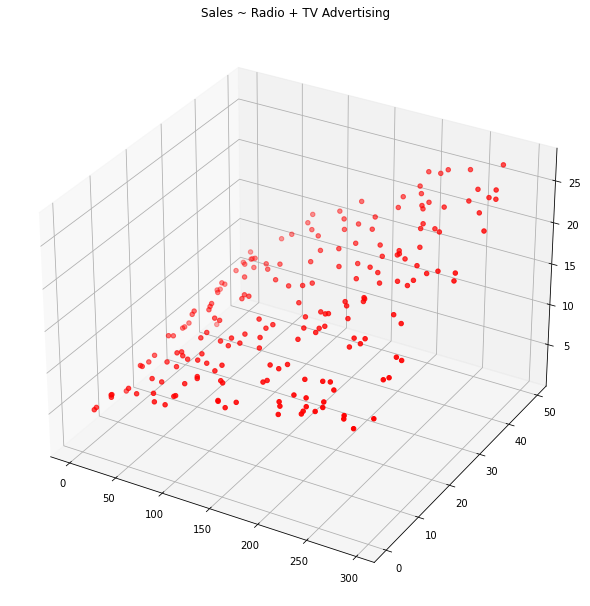

In [44]:
fig = plt.figure(figsize=(12,8))
# fig.title("Sales ~ Radio + TV Advertising")

ax = axes3d.Axes3D(fig)
ax.set_title("Sales ~ Radio + TV Advertising")
ax.scatter3D(data['TV'],data['Radio'],data['Sales'],c='r')

In [45]:
credit = pd.read_csv("C:\\Users\\Dell 5480\\Documents\\Devbooks\\Introduction to Statistical Learning 2nd Edition\\ALL CSV FILES - 2nd Edition\\Credit.csv")
credit.head()

,Income,Limit,Rating,Cards,Age,Education,Own,Student,Married,Region,Balance
0,14.891,3606,283,2,34,11,No,No,Yes,South,333
1,106.025,6645,483,3,82,15,Yes,Yes,Yes,West,903
2,104.593,7075,514,4,71,11,No,No,No,West,580
3,148.924,9504,681,3,36,11,Yes,No,No,West,964
4,55.882,4897,357,2,68,16,No,No,Yes,South,331


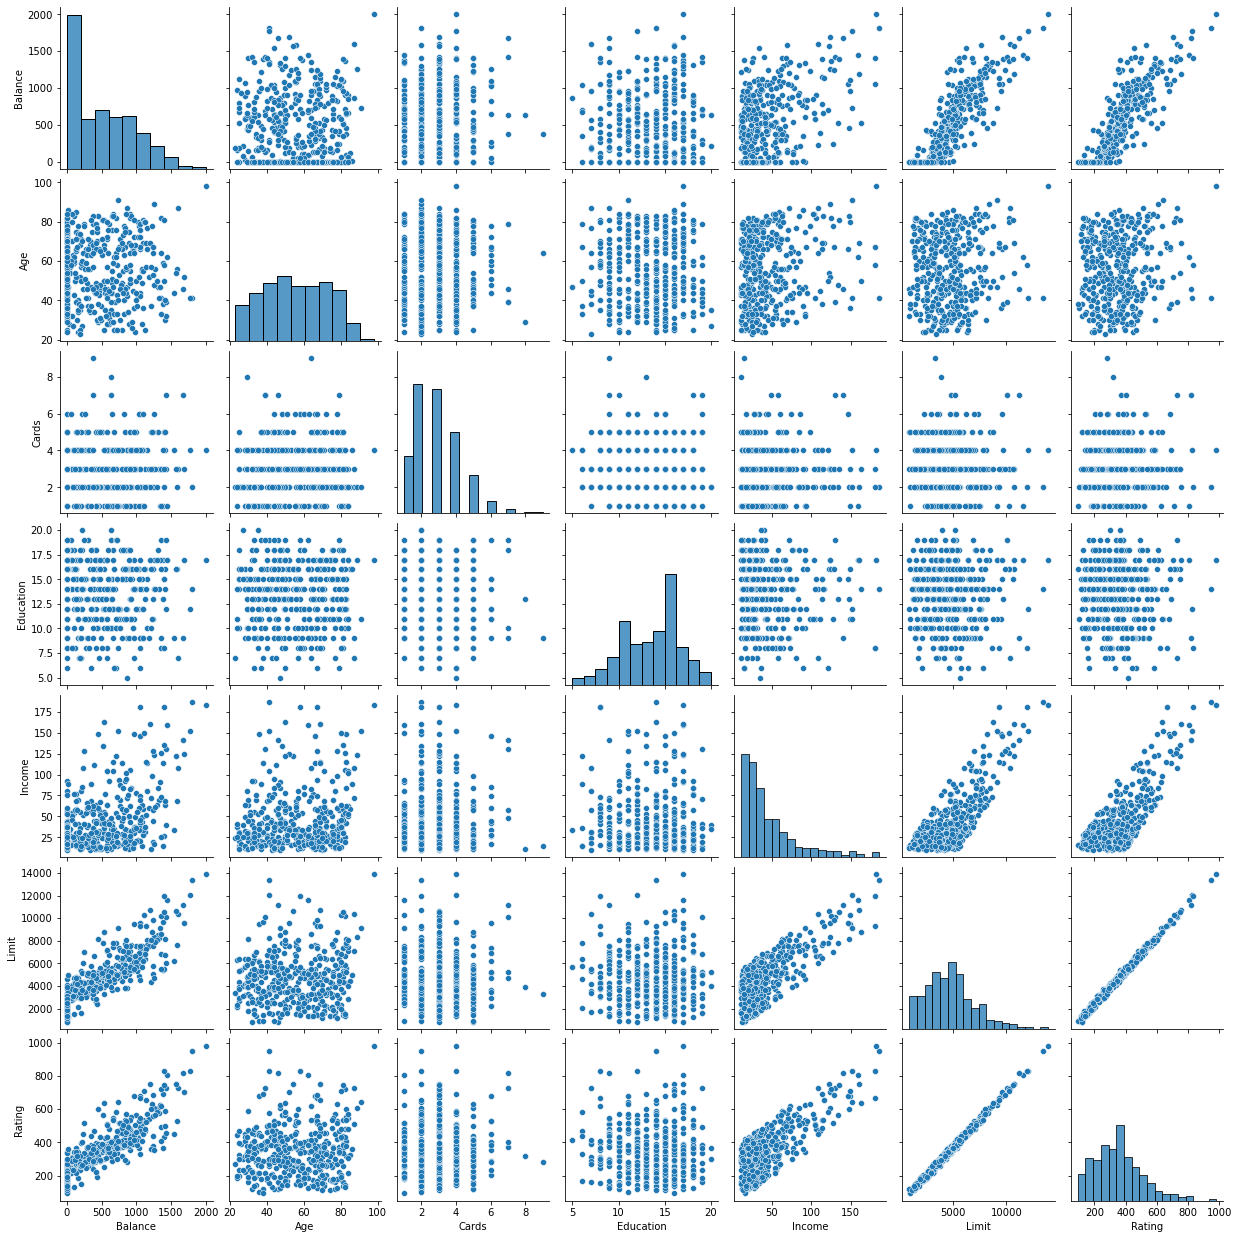

In [46]:
sns.pairplot(credit[['Balance','Age','Cards','Education','Income', 'Limit', 'Rating']])

In [47]:
est = smf.ols('Balance ~ Region',data=credit).fit()

In [48]:
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                   0.04344
Date:                Sat, 19 Feb 2022   Prob (F-statistic):              0.957
Time:                        10:20:30   Log-Likelihood:                -3019.3
No. Observations:                 400   AIC:                             6045.
Df Residuals:                     397   BIC:                             6057.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         531.0000     46.319     11.464      0.000     439.939     622.061
Region[T.South]   -12.5025     56.681     -0.221      0.826    -123.935      98.930
Region[T.West]    -18.6863     65.021     -0.287      0.774    -146.515     109.142
==============================================================================
Omnibus:                       28.829   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.395
Skew:                           0.581   Prob(JB):                     1.13e-06
Kurtosis:                       2.460   Cond. No.                         4.39
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
auto = pd.read_csv("./Data/Auto.csv")
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [66]:
auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


<h3> Plotting residuals

In [98]:
y = auto['mpg']
y.fillna(0,inplace=True)
X = auto[['horsepower']]

In [88]:
y.dtype

dtype('float64')

In [89]:
tm = LinearRegression()

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [101]:
est = smf.ols('mpg ~ horsepower',data=auto).fit()

In [111]:
auto.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

In [3]:
df = pd.read_excel('./Data/Default.xlsx',index_col='Unnamed: 0')

C:\Users\Dell 5480\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [4]:
len(df['default'].factorize()[0])

10000

In [5]:
len(df['default'])

10000

In [6]:
df.balance.values.reshape(-1,1).shape

(10000, 1)

In [7]:
df

,default,student,balance,income
1,No,No,729.526495,44361.625074
2,No,Yes,817.180407,12106.134700
3,No,No,1073.549164,31767.138947
4,No,No,529.250605,35704.493935
5,No,No,785.655883,38463.495879
...,...,...,...,...
9996,No,No,711.555020,52992.378914
9997,No,No,757.962918,19660.721768
9998,No,No,845.411989,58636.156984
9999,No,No,1569.009053,36669.112365


In [8]:
df['default2'] = df.default.factorize()[0]
df['student2'] = df.student.factorize()[0]

In [9]:
import matplotlib as mpl

C:\Users\Dell 5480\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


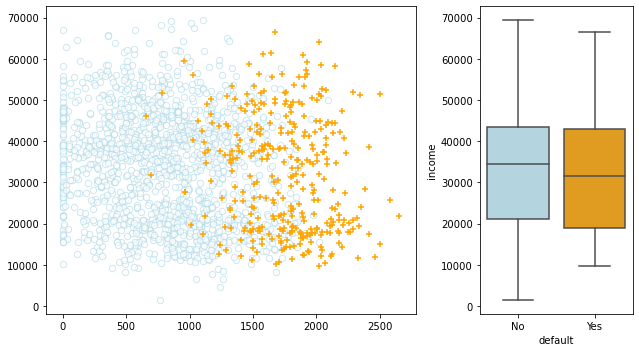

In [28]:
fig = plt.figure(figsize=(12,5))
gs = mpl.gridspec.GridSpec(1,4)
df_no = df[df['default2']==0].sample(frac=0.15)
df_yes = df[df['default2']==1]
df_ = df_no.append(df_yes)

ax1 = plt.subplot(gs[0,0:2])
ax1.scatter(df_[df_['default2']==0].balance,df_[df_['default2']==0].income,s=40,ec='lightblue',facecolor='white',
            alpha=0.6,marker='o',lw=1)
ax1.scatter(df_[df_['default2']==1].balance,df_[df_['default2']==1].income,s=40,c='orange',marker='+')

ax2 = plt.subplot(gs[0,2])
colors = {'No':'lightblue','Yes':'orange'}
sns.boxplot(df_['default'],df_.income,ax=ax2,palette=colors,orient='v')

gs.tight_layout(plt.gcf())

In [32]:
len(df[df['default']=='Yes'])/10000

0.0333

,default,student,balance,income,default2,student2
1,No,No,729.526495,44361.625074,0,0
2,No,Yes,817.180407,12106.134700,0,1
3,No,No,1073.549164,31767.138947,0,0
4,No,No,529.250605,35704.493935,0,0
5,No,No,785.655883,38463.495879,0,0
...,...,...,...,...,...,...
9996,No,No,711.555020,52992.378914,0,0
9997,No,No,757.962918,19660.721768,0,0
9998,No,No,845.411989,58636.156984,0,0
9999,No,No,1569.009053,36669.112365,0,0
